In [18]:
from __future__ import print_function

import os
import subprocess

import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn import tree
from IPython.display import Image  
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("iris.csv", header=0, delimiter=r",")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
class_names = df["species"].unique()
print(class_names)

['setosa' 'versicolor' 'virginica']


In [5]:
df_vector = df.copy()
species = df_vector["species"].unique()
species_to_id = {kind: k for k, kind in enumerate(species)}
print (species_to_id)

{'setosa': 0, 'versicolor': 1, 'virginica': 2}


In [6]:
df_vector["id"] = df_vector["species"].replace(species_to_id)
df_vector.head()

,sepal_length,sepal_width,petal_length,petal_width,species,id
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [7]:
features_names = list(df_vector.columns[:4])
print(features_names)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


In [8]:
y = df_vector["id"]
X = df_vector[features_names]
clf = tree.DecisionTreeClassifier(random_state=0)
cross_val_score(clf, X, y, cv=10)

array([ 1.        ,  0.93333333,  1.        ,  0.93333333,  0.93333333,
        0.86666667,  0.93333333,  1.        ,  1.        ,  1.        ])

In [9]:

dt = tree.DecisionTreeClassifier(min_samples_split=15, random_state=0)
dt.fit(X, y)

with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(dt, out_file=f)
    
command = ["dot", "-Tpng", "iris.dot", "-o", "iris.png"]
subprocess.check_call(command)
os.unlink('iris.dot')

In [15]:
dt.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
dt.predict_proba(X)

array([[ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.   

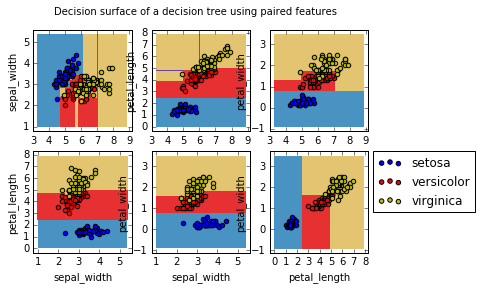

In [27]:
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

X_values = X.values
y_values = y.values

for pair_idx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X_pair = X_values[:, pair]
    y_target = y_values
    
    clf_pair = tree.DecisionTreeClassifier().fit(X_pair, y_target)
    plt.subplot(2, 3, pair_idx + 1)
    
    x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
    y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf_pair.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired) 
    
    plt.xlabel(features_names[pair[0]])
    plt.ylabel(features_names[pair[1]])
    plt.axis("tight") 
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_target == i)
        plt.scatter(X_pair[idx, 0], X_pair[idx, 1], c=color, label=class_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")
    
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()